Bien, en la Notebook pasada, pudimos ver que el crecimiento exponencial de las ventas en AtliQ en Chile comenzo realmente en Agosto del 2021. Nos damos cuenta que este crecimiento no se debio ni a la plataforma de venta, ni a las categorias de cada producto, ni a los productos en si. Vemos que este crecimiento no fue solo en Chile, si no en todo Latinoamerica. 
En esta Notebook descubriremos por que



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utility import plot_settings
from scripts. used_functions import *

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [2]:
LATAM = pd.read_pickle('../../data/raw/AtliQ_sales_LATAM.pkl')
LATAM['date'] = pd.to_datetime(LATAM['date'])   


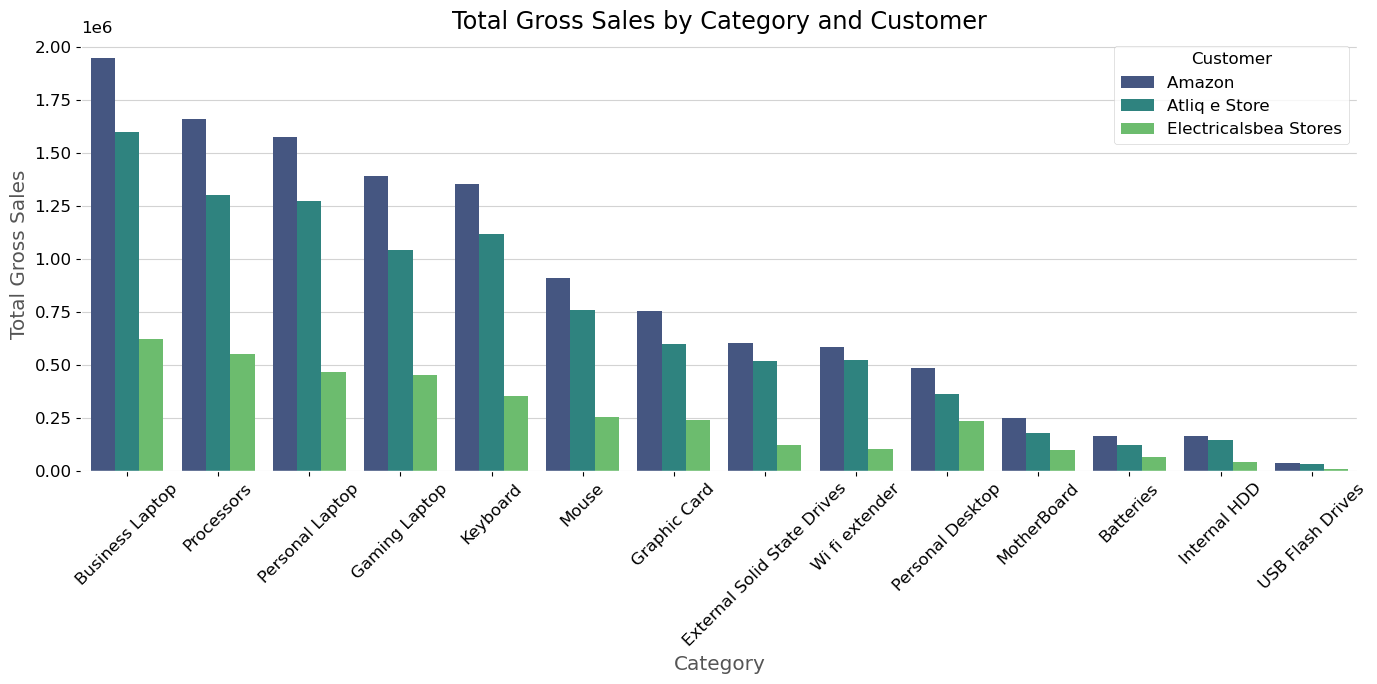

In [3]:
plot_sales_by_category_and_customer(LATAM)

Wow, aqui reutilizamos una funcion aplicada a las ventas en Chile. Podemos ver que aqui Electricalsbea Stores se queda muy atras comparada a las otras, pero esto creo es porque quiza esta tienda fisica no se encuentre en todos los paises. De todos formas, el tipo de cliente y plataforma no nos interesan, puesto que ya vimos que se comportan de una forma muy similar, cierto? 
Lo que nos interesa son las ventas totales por categoria, y lo que mas destaca a mi parecer, son las Laptops en general. Como vimos en nuestra matriz de graficas por categoria en Chile, hay demasiadas categorias que llevan en el mercado mas de dos anos! Pero estas comienzan a incrementar de forma tan abrupta hasta Agosto del 2021!  

Estas categorias son las que quiero visualizar, pero solo aquellas que le generan la mayor cantidad de ingresos al negocio; ademas, quisiera hacerlo solo con aquellas de las que tengo 5 meses de datos previos a Agosto, para poder compararlas a los 5 meses posteriorees. Es decir, la idea es que el punto pivotal, se encuentre en el medio

In [4]:
selected_categories = ['Business Laptop', 'Personal Laptop','Gaming Laptop','Processors','Graphic Card']
top_categories = LATAM.loc[LATAM['category'].isin(selected_categories)]

start_date = '2021-03-01'
end_date = '2022-01-31'

# date range filter
filtered_data = top_categories[(top_categories['date'] >= start_date) & (top_categories['date'] <= end_date)].reset_index(drop=True)

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           7288 non-null   object        
 1   platform           7288 non-null   object        
 2   channel            7288 non-null   object        
 3   market             7288 non-null   object        
 4   date               7288 non-null   datetime64[ns]
 5   sold_quantity      7288 non-null   int64         
 6   division           7288 non-null   object        
 7   segment            7288 non-null   object        
 8   category           7288 non-null   object        
 9   product            7288 non-null   object        
 10  variant            7288 non-null   object        
 11  total_gross_sales  7288 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 683.4+ KB


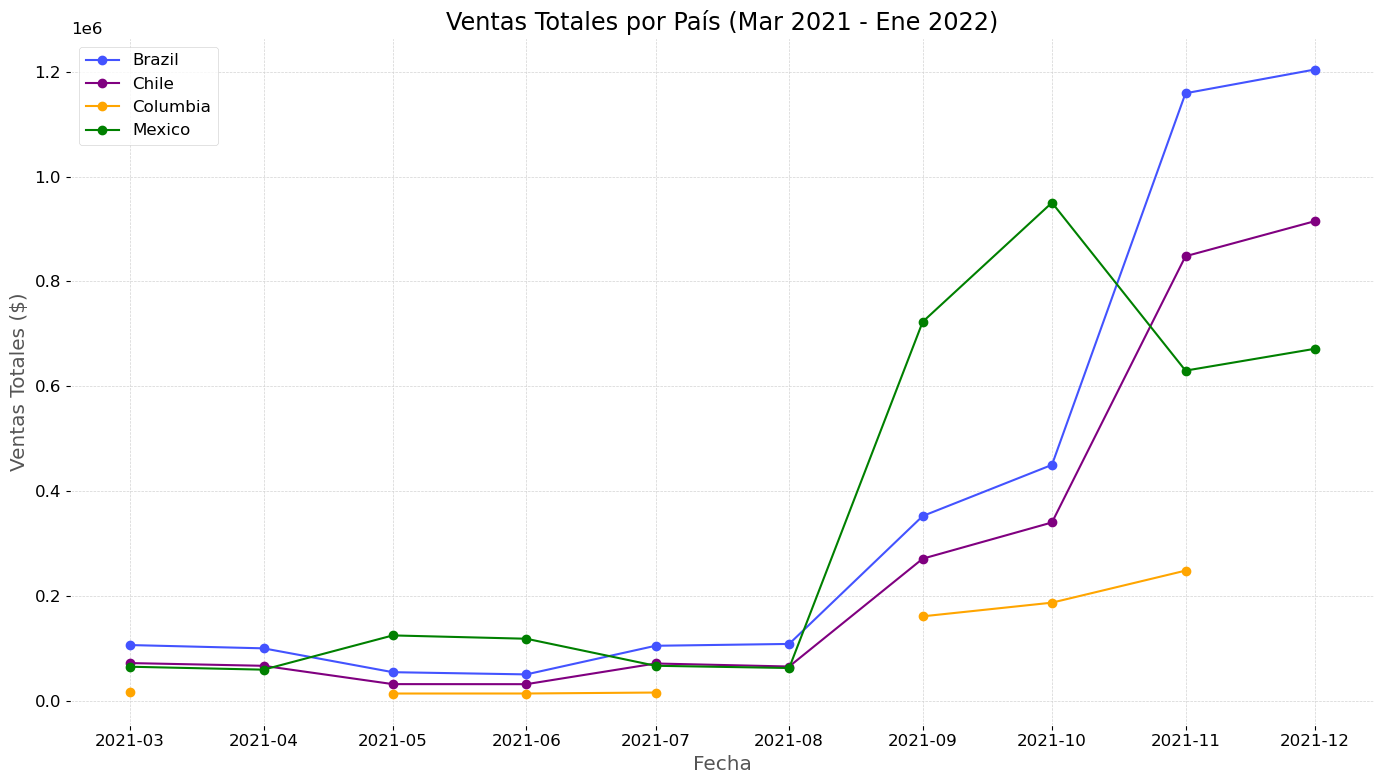

In [5]:

# Agrupar por fecha y país y sumar las ventas totales
grouped_data = filtered_data.groupby(['date', 'market']).sum()['total_gross_sales'].unstack()

# Dibujar la serie temporal para cada país
plt.figure(figsize=(14, 8))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label=country, marker='o')
    
plt.title('Ventas Totales por País (Mar 2021 - Ene 2022)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales ($)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [6]:
filtered_data.query("market=='Columbia'")['date'].unique()

<DatetimeArray>
['2021-03-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
 '2021-11-01 00:00:00']
Length: 7, dtype: datetime64[ns]

Okey, no tenemos datos de Abril ni Agosto en Colombia. Puesto que Agosto es nuestro mes principal de interes, dropeare todo el pais de Colombia. No quisiera que se sesgara el analisis por datos faltantes, ademas, siendo Colombia el pais con menos ventas y menos datos, no creo que afecte mucho el analisis

In [7]:
filtered_data2 = filtered_data.loc[~(filtered_data['market']=='Columbia')]

In [8]:
filtered_data2

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Atliq e Store,E-Commerce,Direct,Brazil,2021-03-01,4,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,78.09
1,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-03-01,1,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,19.52
2,Amazon,E-Commerce,Retailer,Chile,2021-03-01,3,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,58.57
4,Amazon,E-Commerce,Retailer,Mexico,2021-03-01,6,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,117.14
5,Amazon,E-Commerce,Retailer,Brazil,2021-03-01,5,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,97.62
...,...,...,...,...,...,...,...,...,...,...,...,...
7283,Atliq e Store,E-Commerce,Direct,Mexico,2021-12-01,2,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"1,719.47"
7284,Atliq e Store,E-Commerce,Direct,Brazil,2021-12-01,11,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"9,457.07"
7285,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-12-01,4,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"3,438.93"
7286,Amazon,E-Commerce,Retailer,Chile,2021-12-01,7,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"6,018.13"


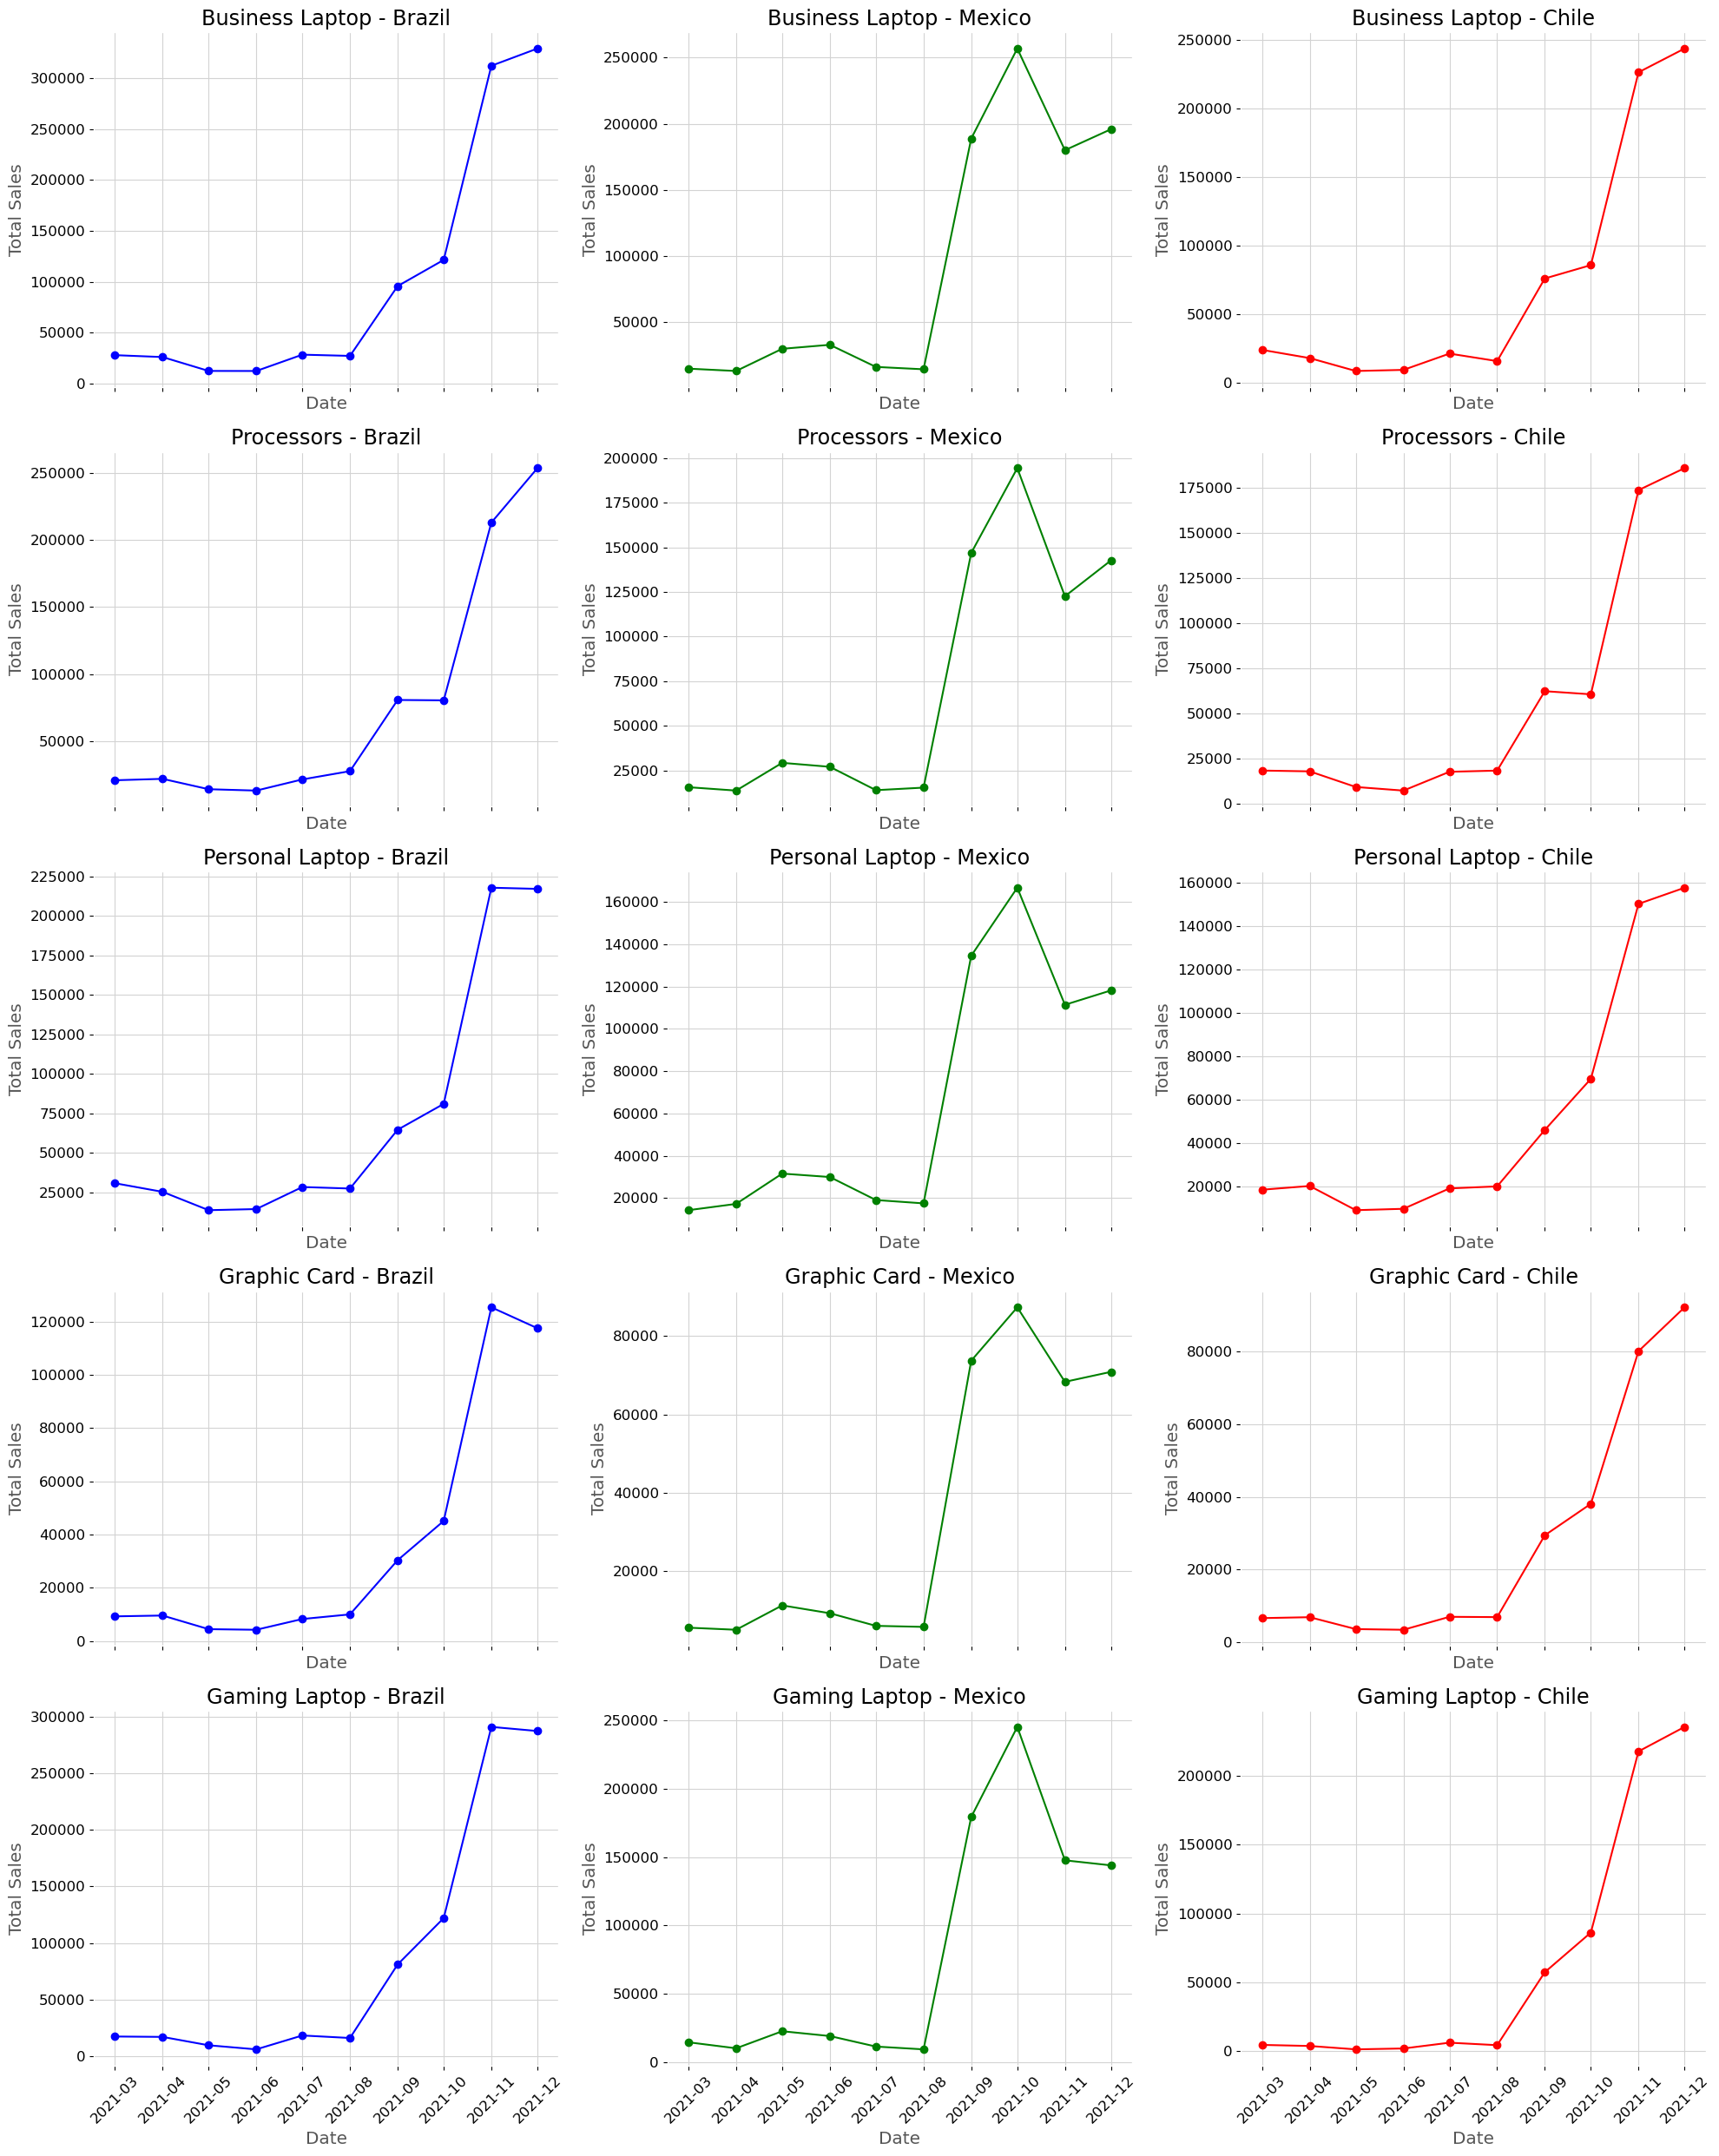

In [9]:
# You can find this function in the used_functions.py file
plot_sales_category_matrix_country(filtered_data2)

Le pedi este grafico a Code Interpreter, y es asombroso! Es una matriz de 5x3, donde cada row es una categoria distinta, y cada column es un pais! 
Podemos ver tendencias claras en la imagen!! 
La caida de Mexico no se debio a una categoria en especifico, si no a todo el pais. Puesto que estas son las categorias mas influyentes en las ventas, las tendencias aqui las podemos generalizar a todo el contexto en las ventas de AtliQ en Latinoamerica.